In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/CPIAUCSL.csv')
df2=pd.read_csv('/content/drive/MyDrive/FEDFUNDS.csv')
df3=pd.read_csv('/content/drive/MyDrive/GDP.csv')
df4=pd.read_csv('/content/drive/MyDrive/INDPRO.csv')
df5=pd.read_csv('/content/drive/MyDrive/JTSJOL.csv')
df6=pd.read_csv('/content/drive/MyDrive/UMCSENT.csv')
df7=pd.read_csv('/content/drive/MyDrive/USGOVT.csv')
df8=pd.read_csv('/content/drive/MyDrive/LFWA64TTUSM647S.csv')

In [ ]:
df9=pd.read_csv('/content/drive/MyDrive/UNRATE.csv')

In [ ]:
merged_df1 = pd.merge(df1, df2, on='DATE',how='left')
merged_df2 = pd.merge(df3, df4, on='DATE',how='right')
merged_df3 = pd.merge(df5, df6, on='DATE',how='left')
merged_df4 = pd.merge(df7, df8, on='DATE',how='left')
# merged_df5 = pd.merge(df9, df10, on='DATE',how='inner')

In [ ]:
merged_df12 = pd.merge(merged_df1, merged_df2, on='DATE',how='left')
merged_df34 = pd.merge(merged_df3, merged_df4, on='DATE',how='left')

In [ ]:
merged_df1234=pd.merge(merged_df12, merged_df34, on='DATE',how='left')

In [ ]:
merged_df= pd.merge(merged_df1234, df9, on='DATE',how='left')

In [ ]:
merged_df

,DATE,CPIAUCSL,FEDFUNDS,GDP,INDPRO,JTSJOL,UMCSENT,USGOVT,LFWA64TTUSM647S,UNRATE
0,1947-01-01,21.480,NaN,243.164,13.6585,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,13.7391,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,13.8198,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,13.7122,NaN,NaN,NaN,NaN,NaN
4,1947-05-01,21.950,NaN,NaN,13.7660,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
921,2023-10-01,307.531,5.33,27944.627,102.5502,8685.0,63.8,22970.0,2.091114e+08,3.8
922,2023-11-01,308.024,5.33,NaN,102.9955,8931.0,61.3,23000.0,2.092484e+08,3.7
923,2023-12-01,308.742,5.33,NaN,102.6920,8889.0,69.7,23076.0,2.093341e+08,3.7
924,2024-01-01,309.685,5.33,NaN,102.2251,8863.0,79,23128.0,NaN,3.7


In [ ]:
merged_df=merged_df.rename(columns={"LFWA64TTUSM647S": "WAP", "CPIAUCSL": "CPI"})
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      926 non-null    object 
 1   CPI       926 non-null    float64
 2   FEDFUNDS  836 non-null    float64
 3   GDP       308 non-null    float64
 4   INDPRO    926 non-null    float64
 5   JTSJOL    278 non-null    float64
 6   UMCSENT   278 non-null    object 
 7   USGOVT    278 non-null    float64
 8   WAP       277 non-null    float64
 9   UNRATE    914 non-null    float64
dtypes: float64(8), object(2)
memory usage: 72.5+ KB


In [ ]:
merged_df.describe()

,CPI,FEDFUNDS,GDP,INDPRO,JTSJOL,USGOVT,WAP,UNRATE
count,926.000000,836.000000,308.000000,926.000000,278.000000,278.000000,2.770000e+02,914.000000
mean,119.437087,4.603409,7159.348721,59.556383,5321.884892,22073.212230,1.989313e+08,5.700547
std,85.211463,3.588310,7393.002277,30.416058,2314.290198,428.338965,7.937159e+06,1.710258
min,21.480000,0.050000,243.164000,13.174500,2232.000000,20804.000000,1.800659e+08,2.500000
25%,32.297500,1.807500,802.669250,33.984850,3674.750000,21831.250000,1.935862e+08,4.400000
50%,107.800000,4.190000,4340.830000,54.734150,4606.000000,22056.000000,2.014939e+08,5.500000
75%,191.400000,6.240000,12360.783750,92.044900,6360.750000,22409.750000,2.056543e+08,6.700000
max,311.054000,19.100000,27944.627000,104.118100,12182.000000,23128.000000,2.093341e+08,14.800000


In [ ]:
# threshold='2015-01-01'
# df=merged_df.drop(merged_df['DATE']<threshold)

In [ ]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      926 non-null    datetime64[ns]
 1   CPI       926 non-null    float64       
 2   FEDFUNDS  836 non-null    float64       
 3   GDP       308 non-null    float64       
 4   INDPRO    926 non-null    float64       
 5   JTSJOL    278 non-null    float64       
 6   UMCSENT   278 non-null    object        
 7   USGOVT    278 non-null    float64       
 8   WAP       277 non-null    float64       
 9   UNRATE    914 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 72.5+ KB


In [ ]:
threshold_date = pd.to_datetime('2013-01-01')

In [ ]:
df = merged_df[merged_df['DATE'] >= threshold_date]

In [ ]:
df['UMCSENT'] = pd.to_numeric(df['UMCSENT'], errors='coerce')


<ipython-input-240-61157db1fb80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UMCSENT'] = pd.to_numeric(df['UMCSENT'], errors='coerce')


In [ ]:
df['GDP']=df['GDP'].ffill()

<ipython-input-241-7ac58dacc845>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP']=df['GDP'].ffill()


In [ ]:
df

,DATE,CPI,FEDFUNDS,GDP,INDPRO,JTSJOL,UMCSENT,USGOVT,WAP,UNRATE
792,2013-01-01,231.679,0.14,16648.189,98.2029,3923.0,73.8,21869.0,2.017197e+08,8.0
793,2013-02-01,232.937,0.15,16648.189,98.6733,4004.0,77.6,21881.0,2.018844e+08,7.7
794,2013-03-01,232.282,0.14,16648.189,99.0788,4076.0,78.6,21870.0,2.020217e+08,7.5
795,2013-04-01,231.797,0.15,16728.687,98.9658,3988.0,76.4,21869.0,2.021652e+08,7.6
796,2013-05-01,231.893,0.11,16728.687,99.0567,4145.0,84.5,21864.0,2.022888e+08,7.5
...,...,...,...,...,...,...,...,...,...,...
921,2023-10-01,307.531,5.33,27944.627,102.5502,8685.0,63.8,22970.0,2.091114e+08,3.8
922,2023-11-01,308.024,5.33,27944.627,102.9955,8931.0,61.3,23000.0,2.092484e+08,3.7
923,2023-12-01,308.742,5.33,27944.627,102.6920,8889.0,69.7,23076.0,2.093341e+08,3.7
924,2024-01-01,309.685,5.33,27944.627,102.2251,8863.0,79.0,23128.0,NaN,3.7


In [ ]:
df['WAP']=df['WAP'].ffill()
df['JTSJOL']=df['JTSJOL'].ffill()
df['UMCSENT']=df['UMCSENT'].ffill()
df['USGOVT']=df['USGOVT'].ffill()

<ipython-input-243-19f1d9ceaa24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WAP']=df['WAP'].ffill()
<ipython-input-243-19f1d9ceaa24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JTSJOL']=df['JTSJOL'].ffill()
<ipython-input-243-19f1d9ceaa24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [ ]:
df['UNRATE_lag1'] = df['UNRATE'].shift(1)
df['CPI_lag1'] = df['CPI'].shift(1)
df['FEDFUNDS_lag1'] = df['FEDFUNDS'].shift(1)
df['GDP_lag1'] = df['GDP'].shift(1)
df['INDPRO_lag1'] = df['INDPRO'].shift(1)
df['JTSJOL_lag1'] = df['JTSJOL'].shift(1)
df['UMCSENT_lag1'] = df['UMCSENT'].shift(1)
df['USGOVT_lag1'] = df['USGOVT'].shift(1)
df['WAP_lag1'] = df['WAP'].shift(1)

df


<ipython-input-244-0bac6f499089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNRATE_lag1'] = df['UNRATE'].shift(1)
<ipython-input-244-0bac6f499089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPI_lag1'] = df['CPI'].shift(1)
<ipython-input-244-0bac6f499089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,DATE,CPI,FEDFUNDS,GDP,INDPRO,JTSJOL,UMCSENT,USGOVT,WAP,UNRATE,UNRATE_lag1,CPI_lag1,FEDFUNDS_lag1,GDP_lag1,INDPRO_lag1,JTSJOL_lag1,UMCSENT_lag1,USGOVT_lag1,WAP_lag1
792,2013-01-01,231.679,0.14,16648.189,98.2029,3923.0,73.8,21869.0,2.017197e+08,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,2013-02-01,232.937,0.15,16648.189,98.6733,4004.0,77.6,21881.0,2.018844e+08,7.7,8.0,231.679,0.14,16648.189,98.2029,3923.0,73.8,21869.0,2.017197e+08
794,2013-03-01,232.282,0.14,16648.189,99.0788,4076.0,78.6,21870.0,2.020217e+08,7.5,7.7,232.937,0.15,16648.189,98.6733,4004.0,77.6,21881.0,2.018844e+08
795,2013-04-01,231.797,0.15,16728.687,98.9658,3988.0,76.4,21869.0,2.021652e+08,7.6,7.5,232.282,0.14,16648.189,99.0788,4076.0,78.6,21870.0,2.020217e+08
796,2013-05-01,231.893,0.11,16728.687,99.0567,4145.0,84.5,21864.0,2.022888e+08,7.5,7.6,231.797,0.15,16728.687,98.9658,3988.0,76.4,21869.0,2.021652e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2023-10-01,307.531,5.33,27944.627,102.5502,8685.0,63.8,22970.0,2.091114e+08,3.8,3.8,307.288,5.33,27610.128,103.2974,9307.0,67.9,22903.0,2.091107e+08
922,2023-11-01,308.024,5.33,27944.627,102.9955,8931.0,61.3,23000.0,2.092484e+08,3.7,3.8,307.531,5.33,27944.627,102.5502,8685.0,63.8,22970.0,2.091114e+08
923,2023-12-01,308.742,5.33,27944.627,102.6920,8889.0,69.7,23076.0,2.093341e+08,3.7,3.7,308.024,5.33,27944.627,102.9955,8931.0,61.3,23000.0,2.092484e+08
924,2024-01-01,309.685,5.33,27944.627,102.2251,8863.0,79.0,23128.0,2.093341e+08,3.7,3.7,308.742,5.33,27944.627,102.6920,8889.0,69.7,23076.0,2.093341e+08


##MAKING A DECISION TREE REGRESSOR BASED ON IF PANDEMIC OR NOT

In [ ]:
df['pandemic_yes'] = 0
df.loc[(df['DATE'].dt.year >= 2020) & (df['DATE'].dt.year <= 2022), 'pandemic_yes'] = 1

# df = df.set_index("DATE")
df['FEDFUNDS_yoy'] = df['FEDFUNDS'].diff(periods=12) * 100
df['GDP_yoy'] = df['GDP'].pct_change(periods=12) * 100
df['CPI_yoy'] = df['CPI'].pct_change(periods=12) * 100
df['UMCSENT_yoy'] = df['UMCSENT'].pct_change(periods=12) * 100
df['INDPRO_yoy'] = df['INDPRO'].pct_change(periods=12) * 100
df['JTSJOL_yoy'] = df['JTSJOL'].pct_change(periods=12) * 100
df['USGOVT_yoy'] = df['USGOVT'].pct_change(periods=12) * 100
df['WAP_yoy'] = df['WAP'].pct_change(periods=12) * 100

df['GDP_lag1_yoy'] = df['GDP_lag1'].pct_change(periods=12) * 100
df['CPI_lag1_yoy'] = df['CPI_lag1'].pct_change(periods=12) * 100
df['UMCSENT_lag1_yoy'] = df['UMCSENT_lag1'].pct_change(periods=12) * 100
df['INDPRO_lag1_yoy'] = df['INDPRO_lag1'].pct_change(periods=12) * 100
df['JTSJOL_lag1_yoy'] = df['JTSJOL_lag1'].pct_change(periods=12) * 100
df['USGOVT_lag1_yoy'] = df['USGOVT_lag1'].pct_change(periods=12) * 100
df['WAP_lag1_yoy'] = df['WAP_lag1'].pct_change(periods=12) * 100

# Calculate 3-month annualized growth rate and update column names in one line each
df['FEDFUNDS_3m'] = df['FEDFUNDS_lag1'].diff(periods=3) * 100
df['GDP_3m_annualized'] = df['GDP_lag1'].pct_change(periods=3) * 100 * 4
df['CPI_3m_annualized'] = df['CPI_lag1'].pct_change(periods=3) * 100 * 4
df['UMCSENT_3m_annualized'] = df['UMCSENT_lag1'].pct_change(periods=3) * 100 * 4
df['INDPRO_3m_annualized'] = df['INDPRO_lag1'].pct_change(periods=3) * 100 * 4
df['JTSJOL_3m_annualized'] = df['JTSJOL_lag1'].pct_change(periods=3) * 100 * 4
df['USGOVT_3m_annualized'] = df['USGOVT_lag1'].pct_change(periods=3) * 100 * 4
df['WAP_3m_annualized'] = df['WAP_lag1'].pct_change(periods=3) * 100 * 4

# df["Pandemic_Yes"]=df[df["Date"]]

df = df.iloc[1:]
df = df.iloc[12:]

df.tail(30)


<ipython-input-245-87645dd85e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pandemic_yes'] = 0
<ipython-input-245-87645dd85e40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FEDFUNDS_yoy'] = df['FEDFUNDS'].diff(periods=12) * 100
<ipython-input-245-87645dd85e40>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,DATE,CPI,FEDFUNDS,GDP,INDPRO,JTSJOL,UMCSENT,USGOVT,WAP,UNRATE,...,USGOVT_lag1_yoy,WAP_lag1_yoy,FEDFUNDS_3m,GDP_3m_annualized,CPI_3m_annualized,UMCSENT_3m_annualized,INDPRO_3m_annualized,JTSJOL_3m_annualized,USGOVT_3m_annualized,WAP_3m_annualized
896,2021-09-01,273.887,0.08,23828.973,99.0614,10875.0,72.8,22075.0,2.054829e+08,4.7,...,0.473007,-0.194305,3.0,9.215227,6.462235,-60.796140,3.932192,39.535588,3.175617,-0.654689
897,2021-10-01,276.434,0.08,24654.603,100.3045,11365.0,71.7,22036.0,2.053542e+08,4.5,...,0.638249,-0.302160,0.0,9.215227,4.763101,-59.415205,-1.801635,21.634196,1.035516,0.138962
898,2021-11-01,278.799,0.08,24654.603,101.1971,11178.0,67.4,22041.0,2.053820e+08,4.1,...,1.249770,-0.313303,-2.0,13.859263,6.529556,-46.798030,0.724708,13.611136,-0.742855,0.060254
899,2021-12-01,280.808,0.08,24654.603,100.8860,11511.0,70.6,22068.0,2.053544e+08,3.9,...,1.651063,-0.397420,-1.0,13.859263,8.812672,-16.500711,4.281027,10.804851,-0.905346,0.121277
900,2022-01-01,282.390,0.08,25029.116,101.0227,11243.0,67.2,22056.0,2.070308e+08,4.0,...,1.808452,-0.393887,0.0,13.859263,10.107818,-12.087912,7.367552,23.393103,-0.126840,-0.250243
901,2022-02-01,284.535,0.08,25029.116,101.6766,11700.0,62.8,22053.0,2.069887e+08,3.8,...,1.230035,0.944279,0.0,6.076155,8.618332,-25.104603,2.864079,-4.293885,0.363042,3.265776
902,2022-03-01,287.553,0.20,25029.116,102.4780,12182.0,59.4,22052.0,2.068044e+08,3.6,...,1.267392,0.910552,0.0,6.076155,8.229585,-27.299703,1.895311,18.679549,0.217776,3.129256
903,2022-04-01,288.764,0.33,25544.273,102.7953,11773.0,65.2,22085.0,2.069128e+08,3.7,...,0.873702,0.838928,12.0,6.076155,9.607988,-63.456091,6.312075,23.316827,-0.290013,2.824481
904,2022-05-01,291.359,0.77,25544.273,102.7769,11473.0,58.4,22113.0,2.071642e+08,3.6,...,0.784922,0.707786,25.0,8.232924,9.028648,-11.904762,7.018621,18.856177,0.525934,-0.227895
905,2022-06-01,294.996,1.21,25544.273,102.6863,11204.0,50.0,22115.0,2.073676e+08,3.6,...,0.894283,0.733218,69.0,8.232924,9.593196,-28.025478,4.328626,-7.760684,1.088287,0.339203


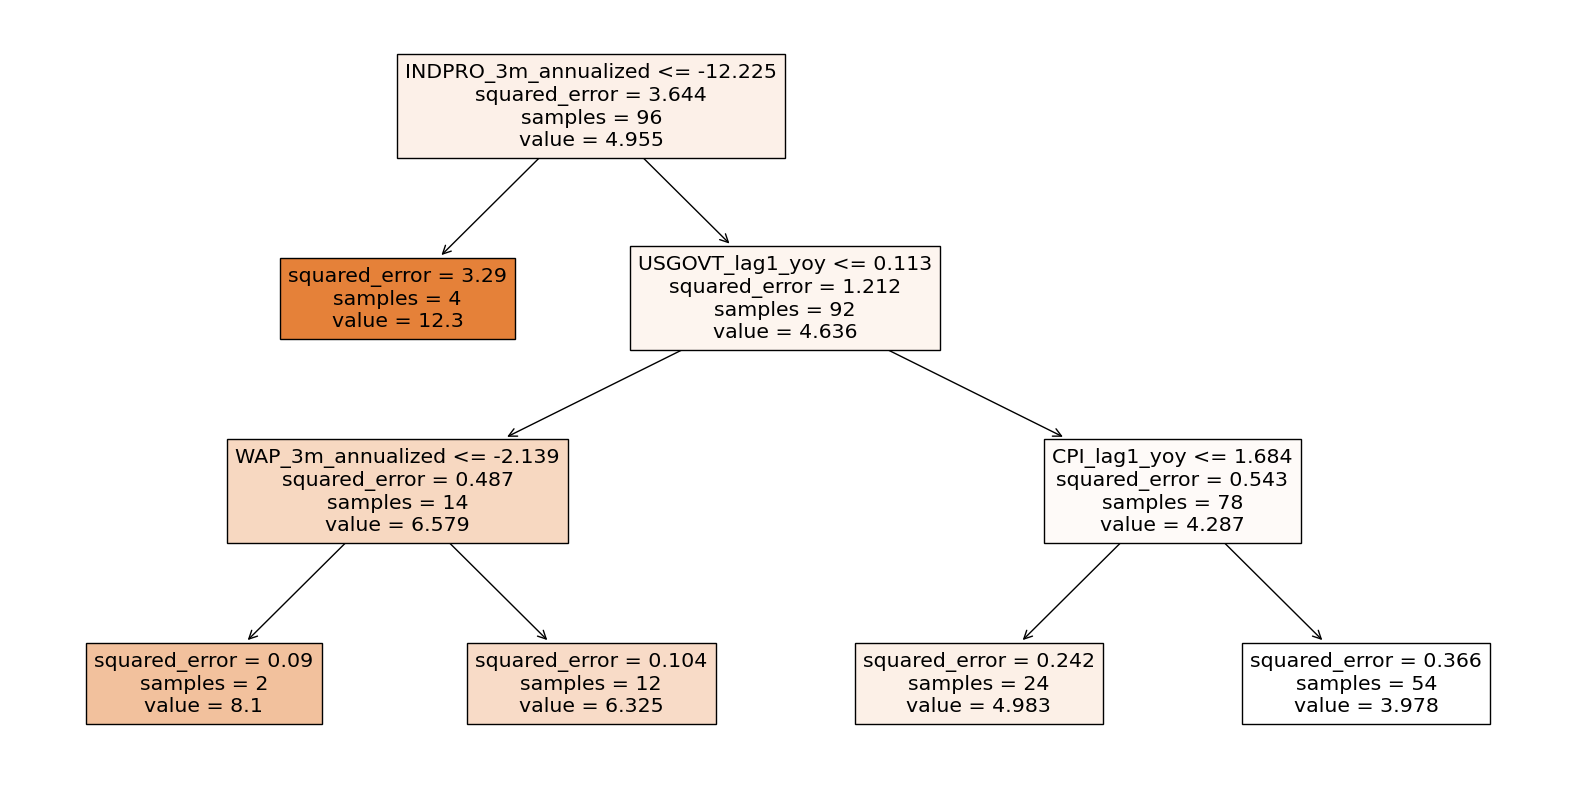

MAPE:  0.11958026176719815


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


features = ['pandemic_yes','GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy', 'JTSJOL_lag1_yoy', 'USGOVT_lag1_yoy', 'WAP_lag1_yoy',
            'GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized',
            'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']

# regressor = DecisionTreeRegressor(random_state=0)

X=df[features]
y=df['UNRATE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

dt_model = DecisionTreeRegressor(random_state=1, min_samples_split=5, max_depth=3)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(dt_model, feature_names=features, filled=True)
plt.show()

print("MAPE: ",mean_absolute_percentage_error(y_test, y_pred))


In [ ]:
# train_df = df[(df['DATE'] < '2020-01-01') | (df['DATE'] > '2021-12-31') & (df['DATE'] < '2024-01-01')]
# test_df = df[df['DATE'] >= '2024-01-01']

# # train_df.tail(30)

In [ ]:
rows_with_nan = df[df['FEDFUNDS'].isna()].index
rows_with_nan

Index([], dtype='int64')

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object and specify the imputation strategy
imputer = SimpleImputer(strategy='mean')
df['UNRATE_lag1'] = imputer.fit_transform(df[['UNRATE_lag1']])

In [ ]:
# train_df = train_df.set_index("DATE")
train_df=df

# train_df.isnull().values.any()

In [ ]:
null_values = train_df.isnull().any()

# Display columns with null values (if any)a
columns_with_null = null_values[null_values].index.tolist()
print("Columns with null values:", columns_with_null)

# Check if there are any null values in the entire DataFrame
if null_values.any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

Columns with null values: []
There are no null values in the DataFrame.


In [ ]:
train_df = train_df[(train_df['DATE'] < '2020-01-01') | (train_df['DATE'] > '2021-12-31')]
test_df = train_df[train_df['DATE'] >= '2024-03-01']
train_df.set_index("DATE", inplace = True)
train_df.head(15)

,CPI,FEDFUNDS,GDP,INDPRO,JTSJOL,UMCSENT,USGOVT,WAP,UNRATE,UNRATE_lag1,...,USGOVT_lag1_yoy,WAP_lag1_yoy,FEDFUNDS_3m,GDP_3m_annualized,CPI_3m_annualized,UMCSENT_3m_annualized,INDPRO_3m_annualized,JTSJOL_3m_annualized,USGOVT_3m_annualized,WAP_3m_annualized
DATE,,,,,,,,,,,,,,,,,,,,,
2014-02-01,235.547,0.07,17197.738,100.7583,4373.0,81.6,21825.0,2.026677e+08,6.7,6.6,...,-0.251498,0.408222,-2.0,0.133062,2.771442,43.715847,0.315051,-9.000474,-0.293175,-0.305625
2014-03-01,236.028,0.08,17197.738,101.7767,4388.0,80.0,21833.0,2.027030e+08,6.7,6.7,...,-0.255930,0.387975,-1.0,0.133062,2.472448,34.620506,2.364872,24.666181,-0.329625,-0.109689
2014-04-01,236.468,0.09,17518.508,101.8425,4566.0,84.1,21853.0,2.027919e+08,6.2,6.7,...,-0.169182,0.337260,-1.0,0.133062,2.230753,-12.121212,5.574943,25.916040,0.238313,-0.074443
2014-05-01,236.918,0.09,17518.508,102.2594,4747.0,81.9,21832.0,2.029294e+08,6.3,6.2,...,-0.073163,0.309987,2.0,7.460749,2.006052,14.285714,7.374074,42.549067,0.715137,0.491271
2014-06-01,237.231,0.10,17518.508,102.5986,4982.0,82.5,21895.0,2.030528e+08,6.1,6.3,...,-0.146359,0.316710,2.0,7.460749,2.328198,1.470588,5.959211,34.209925,0.128293,0.516560
2014-07-01,237.498,0.09,17804.228,102.8163,4846.0,81.8,21901.0,2.030472e+08,6.2,6.1,...,0.251832,0.376985,2.0,7.460749,2.038741,12.500000,3.230209,54.147675,1.135895,0.690118
2014-08-01,237.460,0.09,17804.228,102.6562,5349.0,82.5,21855.0,2.031660e+08,6.1,6.2,...,0.394224,0.358866,0.0,6.523843,1.742308,-10.939358,3.824729,24.529128,0.878598,0.503660
2014-09-01,237.477,0.09,17804.228,102.9776,4914.0,84.6,21897.0,2.032143e+08,5.9,6.1,...,0.109935,0.337084,0.0,6.523843,0.915085,2.930403,1.552131,50.726775,0.421400,0.466322
2014-10-01,237.430,0.09,17912.079,102.9892,5012.0,86.9,21917.0,2.032648e+08,5.7,5.9,...,0.283948,0.288884,-1.0,6.523843,0.414786,10.181818,1.477603,-5.459655,0.036538,0.318182


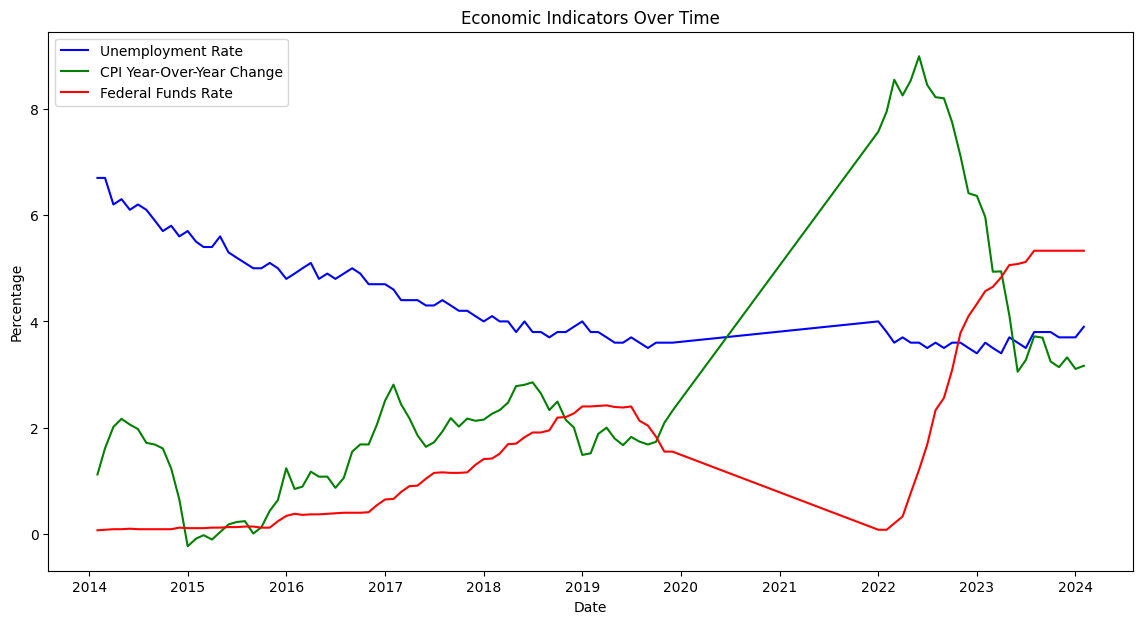

In [ ]:
import matplotlib.pyplot as plt

# Plot the required columns
plt.figure(figsize=(14, 7))

# Assuming 'UNEM' refers to unemployment rate
plt.plot(train_df.index, train_df['UNRATE'], label='Unemployment Rate', color='blue')

# Assuming 'CPI_yoy' refers to the year-over-year change in the Consumer Price Index
plt.plot(train_df.index, train_df['CPI_yoy'], label='CPI Year-Over-Year Change', color='green')

# Plotting 'FEDFUNDS'
plt.plot(train_df.index, train_df['FEDFUNDS'], label='Federal Funds Rate', color='red',)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Economic Indicators Over Time')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# plt.figure(figsize=(14, 7))

# # Assuming 'UNEM' refers to unemployment rate
# plt.plot(train_df[(train_df["DATE"]<"2015-01-01") & (train_df["DATE"]>"2017-01-01")].index, train_df[(train_df["DATE"]<"2017-01-01") & (train_df["DATE"]>"2015-01-01")]['UNRATE'], label='Unemployment Rate', color='blue')

In [ ]:
# import numpy as np
# print(X_train.isnull().sum())  # Check for null values
# print(X_train.isin([np.nan, np.inf, -np.inf]).sum())  # Check for inf and NaN values


**OLS: YEAR Over YEAR**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

columns_to_include = ['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy','JTSJOL_lag1_yoy','USGOVT_lag1_yoy','WAP_lag1_yoy']
# columns_to_include=['GDP_3m_annualized','FEDFUNDS_3m','CPI_3m_annualized','UMCSENT_3m_annualized','INDPRO_3m_annualized','JTSJOL_3m_annualized','USGOVT_3m_annualized','WAP_3m_annualized']

# Preparing the data
X = train_df[columns_to_include]  # Exclude target variable and date
y = train_df['UNRATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Add a constant to the model (the intercept)
X_train_sm = sm.add_constant(X_train)

train_df.head(5)
# X_train.head(10)

# Fit the model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict and evaluate (adding constant to the test set)
X_test_sm = sm.add_constant(X_test)
predictions = results.predict(X_test_sm)

# Calculate MSE manually or use a function from sklearn.metrics if desired
mse = ((predictions - y_test) ** 2).mean()
print(f'MSE: {mse}')

print("MAPE: ",mean_absolute_percentage_error(y_test, predictions))
# print("MSE: ",mean_squared_error(y_test, predictions))


                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     11.99
Date:                Wed, 01 May 2024   Prob (F-statistic):           6.74e-10
Time:                        00:45:23   Log-Likelihood:                -66.603
No. Observations:                  77   AIC:                             149.2
Df Residuals:                      69   BIC:                             168.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4864      0.322  

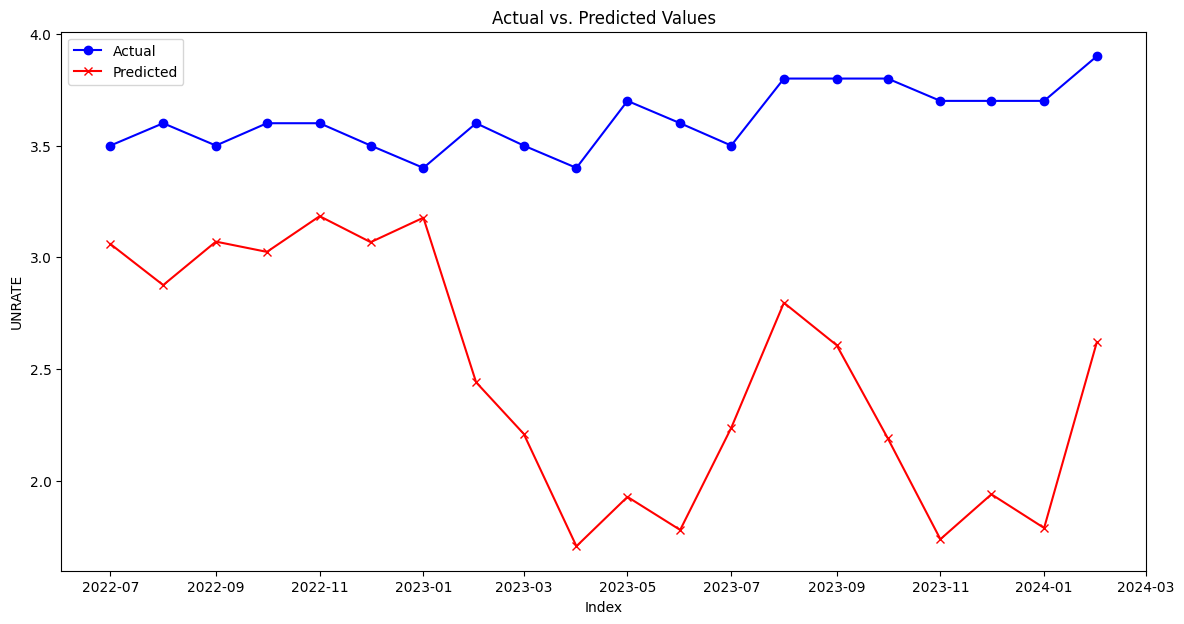

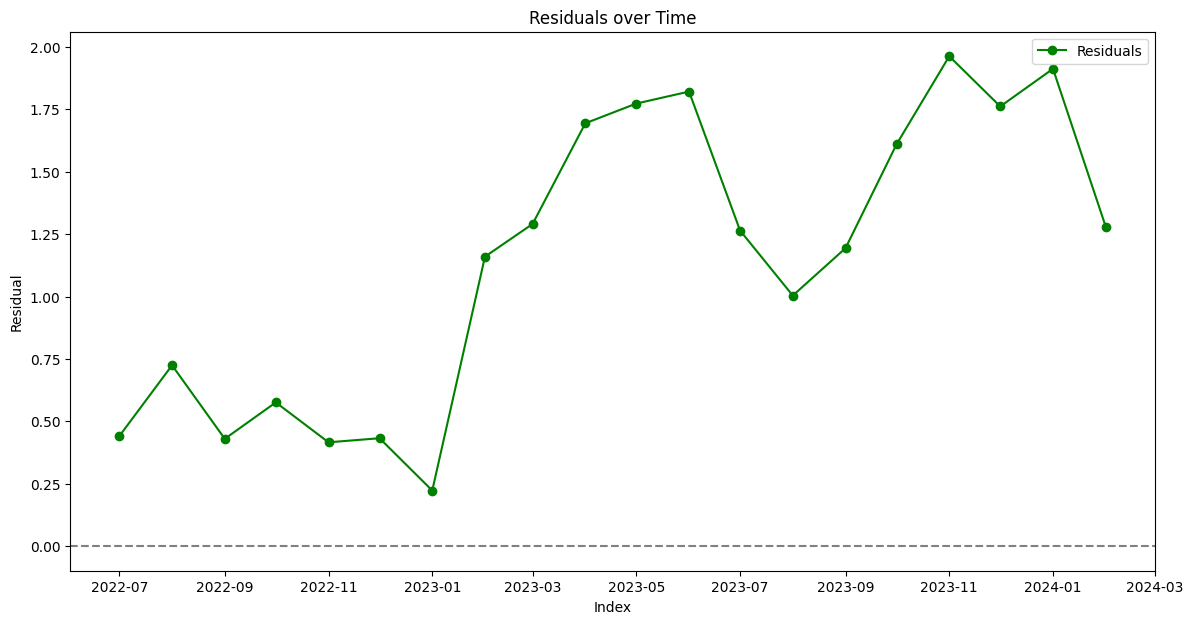

In [ ]:
import matplotlib.pyplot as plt

# Assuming your predictions and y_test are already defined as before

# Plotting actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', marker='x', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('UNRATE')
plt.legend()
plt.show()

# Plotting residuals
residuals = y_test - predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, residuals, label='Residuals', marker='o', color='green')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Residuals over Time')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.show()


OLS: 3Month Annualized

In [ ]:
X_train_sm

,const,GDP_lag1_yoy,CPI_lag1_yoy,UMCSENT_lag1_yoy,INDPRO_lag1_yoy,JTSJOL_lag1_yoy,USGOVT_lag1_yoy,WAP_lag1_yoy
DATE,,,,,,,,
2014-02-01,1.0,3.300954,1.557759,10.027100,1.828968,5.200102,-0.251498,0.408222
2014-03-01,1.0,3.300954,1.120475,5.154639,2.113034,9.215784,-0.255930,0.387975
2014-04-01,1.0,3.300954,1.612695,1.781170,2.722984,7.654563,-0.169182,0.337260
2014-05-01,1.0,4.721357,2.015125,10.078534,2.906762,14.493480,-0.073163,0.309987
2014-06-01,1.0,4.721357,2.166948,-3.076923,3.233199,14.523522,-0.146359,0.316710
...,...,...,...,...,...,...,...,...
2022-02-01,1.0,10.747394,7.569767,-14.936709,2.266672,56.478775,1.230035,0.944279
2022-03-01,1.0,10.747394,7.948919,-18.229167,6.607853,49.654643,1.267392,0.910552
2022-04-01,1.0,10.747394,8.547431,-30.035336,4.425430,42.998004,0.873702,0.838928


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

columns_to_include = ['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized','JTSJOL_3m_annualized','USGOVT_3m_annualized','WAP_3m_annualized']

# Preparing the data
X = train_df[columns_to_include]  # Exclude target variable and date
y = train_df['UNRATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Add a constant to the model (the intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict and evaluate (adding constant to the test set)
X_test_sm = sm.add_constant(X_test)
predictions = results.predict(X_test_sm)

# Calculate MSE manually or use a function from sklearn.metrics if desired
mse = ((predictions - y_test) ** 2).mean()
print(f'MSE: {mse}')

print("MAPE: ",mean_absolute_percentage_error(y_test, predictions))


                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4.197
Date:                Wed, 01 May 2024   Prob (F-statistic):           0.000664
Time:                        00:45:24   Log-Likelihood:                -83.580
No. Observations:                  77   AIC:                             183.2
Df Residuals:                      69   BIC:                             201.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.94

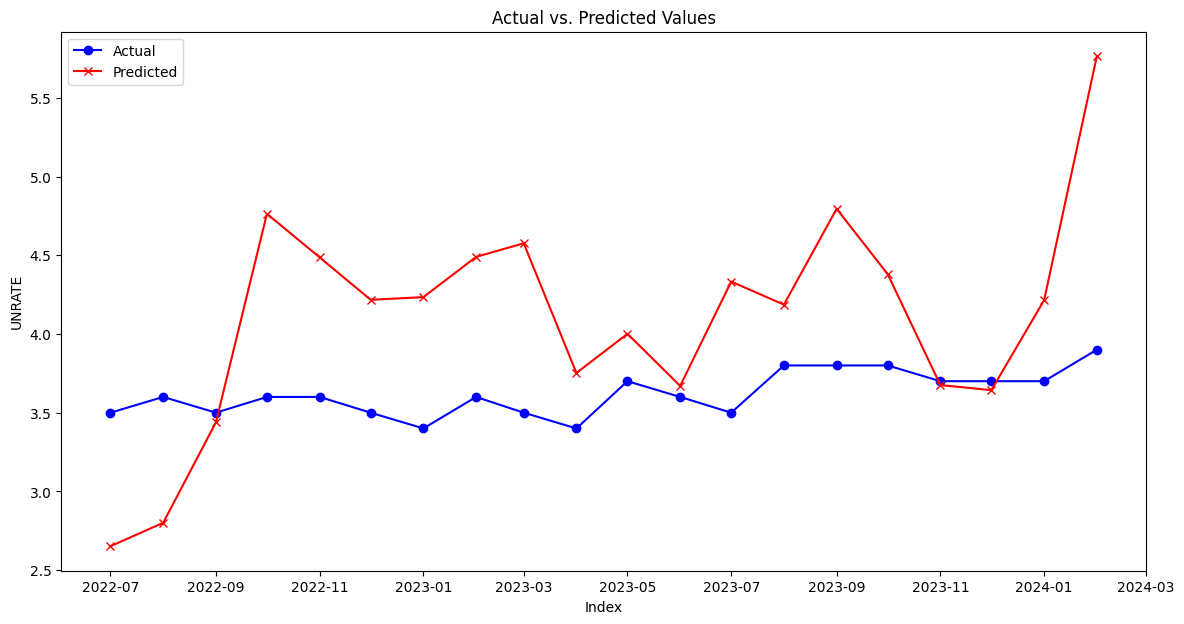

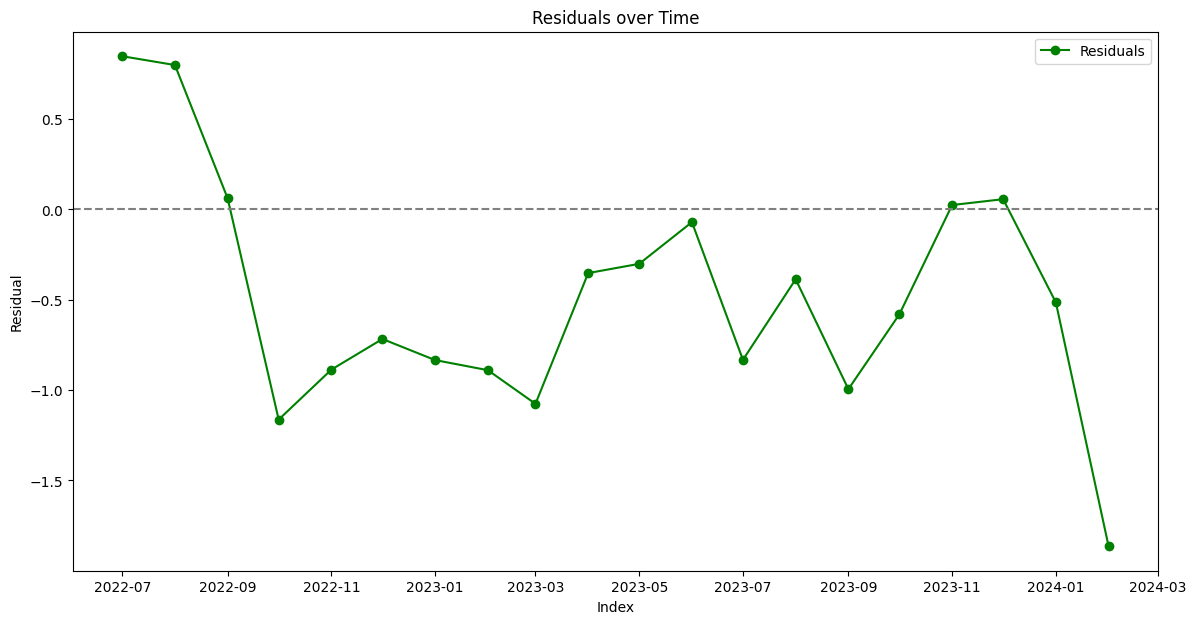

In [ ]:
import matplotlib.pyplot as plt

# Assuming your predictions and y_test are already defined as before

# Plotting actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', marker='x', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('UNRATE')
plt.legend()
plt.show()

# Plotting residuals
residuals = y_test - predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, residuals, label='Residuals', marker='o', color='green')
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Residuals over Time')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.show()


##SARIMAX


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog = train_df[['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized','JTSJOL_3m_annualized','USGOVT_3m_annualized','WAP_3m_annualized']]

# Define the target variable
endog = train_df['UNRATE']

# Fit an ARIMAX model - starting with a simple ARIMA(1,0,1) model
model = SARIMAX(endog, exog=exog, order=(1,1,1), seasonal_order=(0,0,0,12), trend='c', enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Summary of the model
results_summary = results.summary()
results_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                   97
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  64.955
Date:                Wed, 01 May 2024   AIC                           -107.911
Time:                        00:45:25   BIC                            -79.935
Sample:                             0   HQIC                           -96.610
                                 - 97                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -0.0030      0.002     -1.244      0.213      -0.008       0.002
GDP_3m_annualized         0.0135      0.006      2.196      0.028       0.001       0.026
CPI_3m_annualized         0.0080      0.010      0.776      0.438      -0.012       0.028
UMCSENT_3m_annualized     0.0006      0.001      1.089      0.276      -0.000       0.002
INDPRO_3m_annualized      0.0010      0.006      0.175      0.861      -0.010       0.012
JTSJOL_3m_annualized      0.0015      0.001      2.526      0.012       0.000       0.003
USGOVT_3m_annualized     -0.0106      0.017     -0.617      0.538      -0.044       0.023
WAP_3m_annualized         0.0230      0.025      0.915      0.360      -0.026       0.072
ar.L1                     0.8357      0.085      9.786      0.000       0.668       1.003
ma.L1                    -1.1045      0.115     -9.608      0.000      -1.330      -0.879
sigma2                    0.0118      0.003      3.587      0.000       0.005       0.018
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.13   Prob(JB):                         0.43
Heteroskedasticity (H):               0.83   Skew:                             0.27
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog = train_df[['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy','JTSJOL_lag1_yoy','USGOVT_lag1_yoy','WAP_lag1_yoy']]

# Define the target variable
endog = train_df['UNRATE']

# Fit an ARIMAX model - starting with a simple ARIMA(1,0,1) model
model = SARIMAX(endog, exog=exog, order=(1,0,1), seasonal_order=(0,0,0,12), trend='c', enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Summary of the model
results_summary = results.summary()
results_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                   97
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  74.851
Date:                Wed, 01 May 2024   AIC                           -127.703
Time:                        00:45:26   BIC                            -99.610
Sample:                             0   HQIC                          -116.351
                                 - 97                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.1501      0.056      2.690      0.007       0.041       0.259
GDP_lag1_yoy        -0.0387      0.027     -1.418      0.156      -0.092       0.015
CPI_lag1_yoy         0.0368      0.040      0.919      0.358      -0.042       0.115
UMCSENT_lag1_yoy     0.0035      0.002      1.819      0.069      -0.000       0.007
INDPRO_lag1_yoy     -0.0118      0.016     -0.758      0.448      -0.042       0.019
JTSJOL_lag1_yoy      0.0068      0.002      3.838      0.000       0.003       0.010
USGOVT_lag1_yoy      0.0141      0.059      0.238      0.812      -0.102       0.130
WAP_lag1_yoy        -0.0777      0.094     -0.825      0.409      -0.262       0.107
ar.L1                0.9597      0.011     83.844      0.000       0.937       0.982
ma.L1               -0.1942      0.122     -1.596      0.110      -0.433       0.044
sigma2               0.0119      0.002      6.174      0.000       0.008       0.016
===================================================================================
Ljung-Box (L1) (Q):                   2.84   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.09   Prob(JB):                         0.63
Heteroskedasticity (H):               0.53   Skew:                            -0.03
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###LAGGED Exog Variables YoY###

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

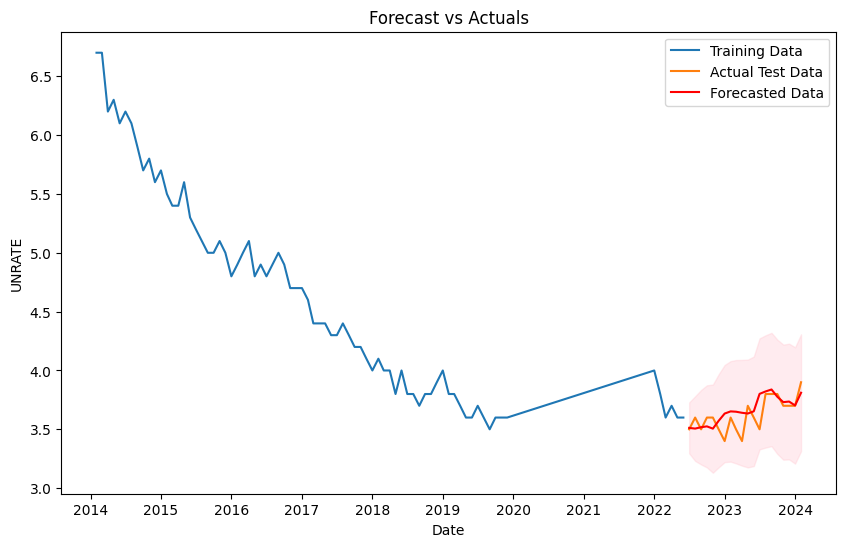

MAPE:  0.024065046320177218
MSE:  0.013860454723665117


In [ ]:
# Calculate the split index for the last 20% of the data
split_idx = int(len(train_df) * 0.8)

# Define training and testing data
train_endog = train_df['UNRATE'][:split_idx]
test_endog = train_df['UNRATE'][split_idx:]
train_exog = train_df[['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy','JTSJOL_lag1_yoy','USGOVT_lag1_yoy','WAP_lag1_yoy']][:split_idx]
test_exog = train_df[['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy','JTSJOL_lag1_yoy','USGOVT_lag1_yoy','WAP_lag1_yoy']][split_idx:]

# Fit the ARIMAX model on the training set
model_train = SARIMAX(train_endog, exog=train_exog, order=(1,0,1), seasonal_order=(0,0,0,12), trend='c', enforce_stationarity=False, enforce_invertibility=False)
results_train = model_train.fit()

# Forecast over the test set duration
forecasts = results_train.get_forecast(steps=len(test_endog), exog=test_exog)
forecast_means = forecasts.predicted_mean
forecast_intervals = forecasts.conf_int()

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(train_df.index[:split_idx], train_endog, label='Training Data')
plt.plot(train_df.index[split_idx:], test_endog, label='Actual Test Data')
plt.plot(train_df.index[split_idx:], forecast_means, label='Forecasted Data', color='red')
plt.fill_between(train_df.index[split_idx:], forecast_intervals.iloc[:, 0], forecast_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('UNRATE')
plt.legend()
plt.show()

print("MAPE: ",mean_absolute_percentage_error(test_endog, forecasts.predicted_mean))
print("MSE: ",mean_squared_error(test_endog, forecasts.predicted_mean))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

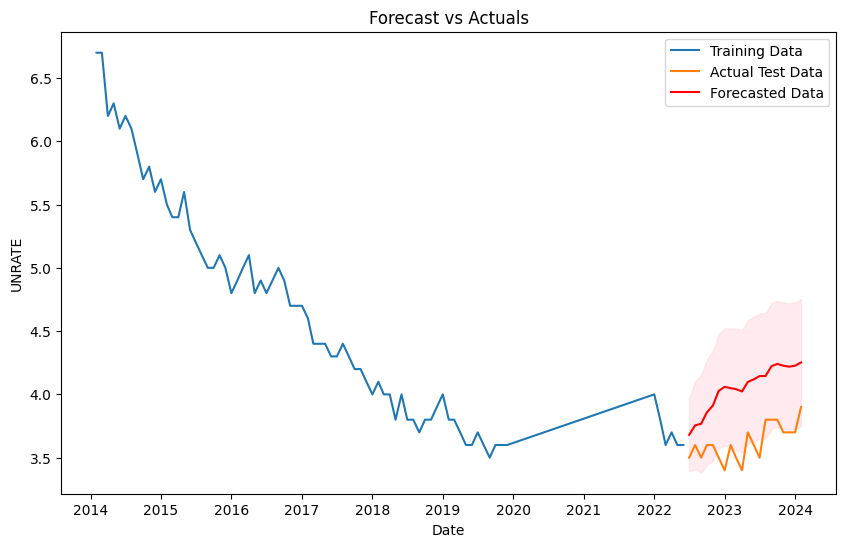

MAPE:  0.1203128501301172
MSE:  0.20862342285469015


In [ ]:
# Calculate the split index for the last 20% of the data
split_idx = int(len(train_df) * 0.8)

# Define training and testing data
train_endog = train_df['UNRATE'][:split_idx]
test_endog = train_df['UNRATE'][split_idx:]
train_exog = train_df[['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized', 'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']][:split_idx]
test_exog = train_df[['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized', 'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']][split_idx:]

# Fit the ARIMAX model on the training set
model_train = SARIMAX(train_endog, exog=train_exog, order=(1,0,1), seasonal_order=(0,0,0,12), trend='c', enforce_stationarity=False, enforce_invertibility=False)
results_train = model_train.fit()

# Forecast over the test set duration
forecasts = results_train.get_forecast(steps=len(test_endog), exog=test_exog)
forecast_means = forecasts.predicted_mean
forecast_intervals = forecasts.conf_int()

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(train_df.index[:split_idx], train_endog, label='Training Data')
plt.plot(train_df.index[split_idx:], test_endog, label='Actual Test Data')
plt.plot(train_df.index[split_idx:], forecast_means, label='Forecasted Data', color='red')
plt.fill_between(train_df.index[split_idx:], forecast_intervals.iloc[:, 0], forecast_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('UNRATE')
plt.legend()
plt.show()


print("MAPE: ",mean_absolute_percentage_error(test_endog, forecasts.predicted_mean))
print("MSE: ",mean_squared_error(test_endog, forecasts.predicted_mean))



##ARIMAX


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

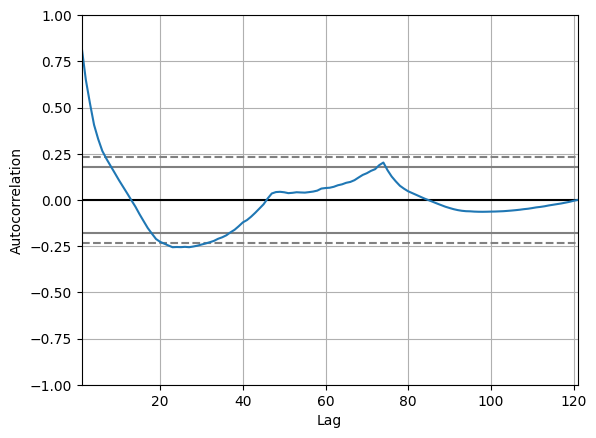

In [ ]:
from pandas.plotting import autocorrelation_plot

series=df["UNRATE"]
autocorrelation_plot(series)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

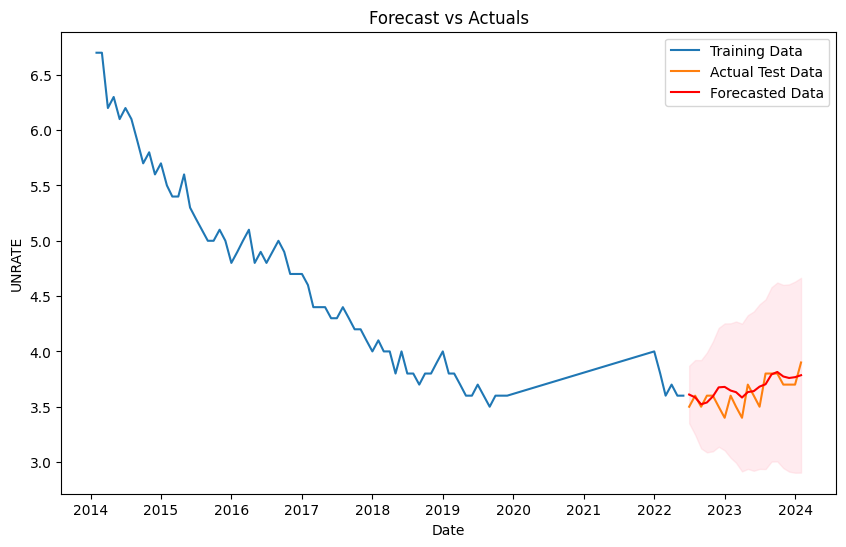

MAPE:  0.02470330573276235
MSE:  0.012699303585548969


In [ ]:
# Calculate the split index for the last 20% of the data
split_idx = int(len(train_df) * 0.8)

# Define training and testing data
train_endog = train_df['UNRATE'][:split_idx]
test_endog = train_df['UNRATE'][split_idx:]
train_exog = train_df[['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized', 'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']][:split_idx]
test_exog = train_df[['GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized', 'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']][split_idx:]

# Fit the ARIMAX model on the training set
model_train = ARIMA(train_endog, exog=train_exog, order=(1,0,1), trend='c', enforce_stationarity=False, enforce_invertibility=False)
results_train = model_train.fit()

# Forecast over the test set duration
forecasts = results_train.get_forecast(steps=len(test_endog), exog=test_exog)
forecast_means = forecasts.predicted_mean
forecast_intervals = forecasts.conf_int()

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(train_df.index[:split_idx], train_endog, label='Training Data')
plt.plot(train_df.index[split_idx:], test_endog, label='Actual Test Data')
plt.plot(train_df.index[split_idx:], forecast_means, label='Forecasted Data', color='red')
plt.fill_between(train_df.index[split_idx:], forecast_intervals.iloc[:, 0], forecast_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('UNRATE')
plt.legend()
plt.show()


print("MAPE: ",mean_absolute_percentage_error(test_endog, forecasts.predicted_mean))
print("MSE: ",mean_squared_error(test_endog, forecasts.predicted_mean))



# **Decision Tree Model**

In [ ]:
train_df['UNRATE_direction'] = (train_df['UNRATE'] > train_df['UNRATE'].shift(1)).astype(int)

<ipython-input-268-86cf647c06df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['UNRATE_direction'] = (train_df['UNRATE'] > train_df['UNRATE'].shift(1)).astype(int)


In [ ]:
features = ['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy', 'JTSJOL_lag1_yoy', 'USGOVT_lag1_yoy', 'WAP_lag1_yoy',
            'GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized',
            'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df['UNRATE_direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# from sklearn.model_selection import train_test_split

# X = train_df[features]
# y = train_df['UNRATE_direction']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

Accuracy: 0.70
Confusion Matrix:
                 Predicted Decrease  Predicted Increase
Actual Decrease                  13                   1
Actual Increase                   5                   1


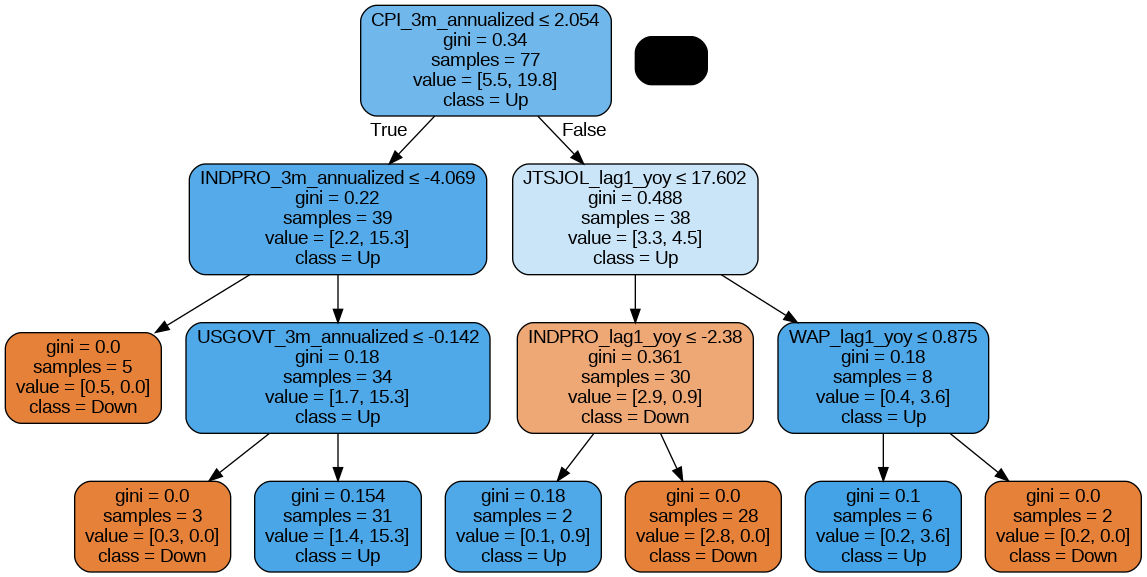

0.2857142857142857

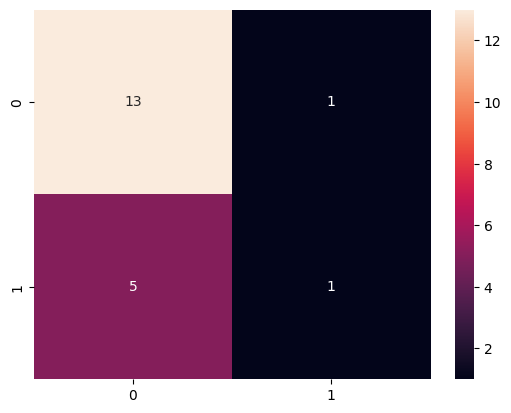

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split=2, class_weight={0:0.1,1:0.9})
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)

confusion_mat_df = pd.DataFrame(confusion_mat,
                                index=['Actual Decrease', 'Actual Increase'],
                                columns=['Predicted Decrease', 'Predicted Increase'])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat_df)

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=features,
                           class_names=['Down', 'Up'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

img = Image(graph.create_png())
display(img)

import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

y_train.mean()

# **Logistic Regression Model**

Logistic Regression Model:
Accuracy: 0.70
Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down              14             0
Actual Up                 6             0
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

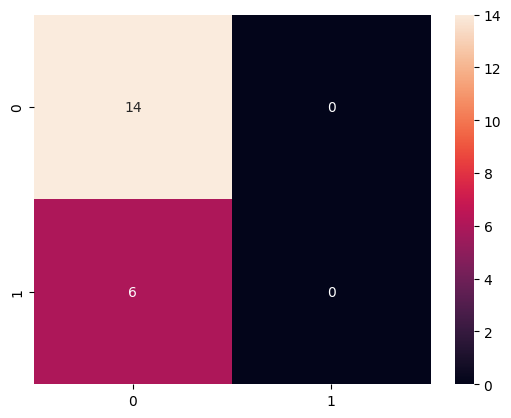

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

lr_y_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_confusion_mat = confusion_matrix(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {lr_accuracy:.2f}")
print("Confusion Matrix:")
lr_cm_df = pd.DataFrame(lr_confusion_mat, index=['Actual Down', 'Actual Up'], columns=['Predicted Down', 'Predicted Up'])
print(lr_cm_df)
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1-score: {lr_f1:.2f}")

import seaborn as sns
sns.heatmap(lr_confusion_mat, annot=True)

##RANDOM FOREST CLASSIFIER

In [ ]:
features = ['GDP_lag1_yoy', 'CPI_lag1_yoy', 'UMCSENT_lag1_yoy', 'INDPRO_lag1_yoy', 'JTSJOL_lag1_yoy', 'USGOVT_lag1_yoy', 'WAP_lag1_yoy',
            'GDP_3m_annualized', 'CPI_3m_annualized', 'UMCSENT_3m_annualized', 'INDPRO_3m_annualized',
            'JTSJOL_3m_annualized', 'USGOVT_3m_annualized', 'WAP_3m_annualized']

X = train_df[features]
y = train_df['UNRATE_direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# rfc_y_pred_proba=rfc_model.predict_proba(X_test_scaled)[:,1]
# threshold=0.4
# rfc_y_pred_th=np.where(rfc_y_pred_proba>=threshold,1,0)
# sum(rfc_y_pred_th),sum(rfc_y_pred)

Random Forest Classifier:
Accuracy: 0.70
Confusion Matrix:
                 Predicted Decrease  Predicted Increase
Actual Decrease                  13                   1
Actual Increase                   5                   1
Precision: 0.50
Recall: 0.17
F1-score: 0.25


<Axes: >

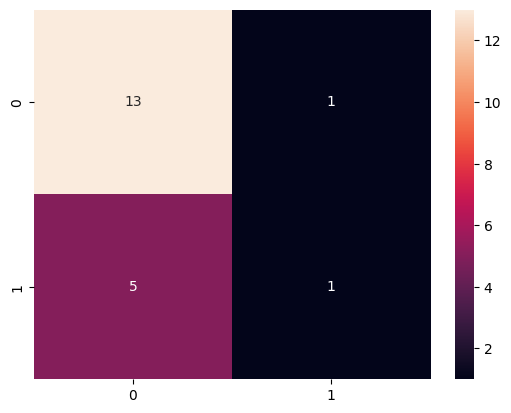

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier(max_depth=3,random_state=42)
rfc_model.fit(X_train_scaled,y_train)

rfc_y_pred = rfc_model.predict(X_test_scaled)
rfc_y_pred_proba=rfc_model.predict_proba(X_test_scaled)[:,1]
threshold=0.45
rfc_y_pred_th=np.where(rfc_y_pred_proba>=threshold,1,0)

rfc_accuracy = accuracy_score(y_test, rfc_y_pred_th)
rfc_confusion_mat = confusion_matrix(y_test, rfc_y_pred_th)
rfc_precision = precision_score(y_test, rfc_y_pred_th)
rfc_recall = recall_score(y_test, rfc_y_pred_th)
rfc_f1 = f1_score(y_test, rfc_y_pred_th)

print("Random Forest Classifier:")
print(f"Accuracy: {rfc_accuracy:.2f}")
print("Confusion Matrix:")
rfc_cm_df = pd.DataFrame(rfc_confusion_mat, index=['Actual Decrease', 'Actual Increase'], columns=['Predicted Decrease', 'Predicted Increase'])
print(rfc_cm_df)
print(f"Precision: {rfc_precision:.2f}")
print(f"Recall: {rfc_recall:.2f}")
print(f"F1-score: {rfc_f1:.2f}")

sns.heatmap(rfc_confusion_mat, annot=True)

## **Neural Networks as a CLassification Algorithm**

Epoch 1/50
3/3 [==============================] - 2s 7ms/step - loss: 0.7335 - accuracy: 0.3766
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.7208 - accuracy: 0.4026
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 0.7092 - accuracy: 0.4805
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6993 - accuracy: 0.5195
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 0.6891 - accuracy: 0.5584
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.6812 - accuracy: 0.5974
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.6742 - accuracy: 0.6104
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.6656 - accuracy: 0.6104
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6577 - accuracy: 0.6234
Epoch 10/50
3/3 [==============================] - 0s 13ms/step - loss: 0.6518 - accuracy: 0.6623
Epoch 11/50
3/3 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

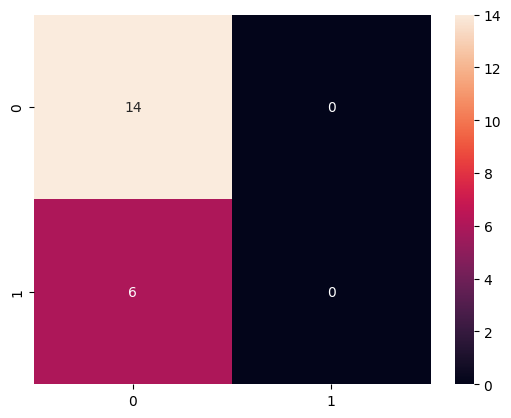

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)


nn_y_pred_prob = model.predict(X_test_scaled)
nn_y_pred = (nn_y_pred_prob > 0.45).astype(int)

nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_confusion_mat = confusion_matrix(y_test, nn_y_pred)
nn_precision = precision_score(y_test, nn_y_pred)
nn_recall = recall_score(y_test, nn_y_pred)
nn_f1 = f1_score(y_test, nn_y_pred)

print("Neural Network Model:")
print(f"Accuracy: {nn_accuracy:.2f}")
print("Confusion Matrix:")
nn_cm_df = pd.DataFrame(nn_confusion_mat, index=['Actual Down', 'Actual Up'], columns=['Predicted Down', 'Predicted Up'])
print(nn_cm_df)
print(f"Precision: {nn_precision:.2f}")
print(f"Recall: {nn_recall:.2f}")
print(f"F1-score: {nn_f1:.2f}")

sns.heatmap(nn_confusion_mat, annot=True)

## **Neural Networks as a Regression Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)
nn_y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, nn_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_percentage_error(y_test, nn_y_pred)

print("Neural Network Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


# print(f"Mean Absolute Percentage Error (MAPE): {mae:.4f}")
# import matplotlib.pyplot as plt

# Plot actual vs predicted values




Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 0.5195
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3048
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2374
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2310
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2124
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1916
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1741
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1512
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1455
Epoch 11/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1377
Epoch 12/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1317
Epoch 13/50
3/3 [==============================] - 0s 6ms/step - loss: 0.

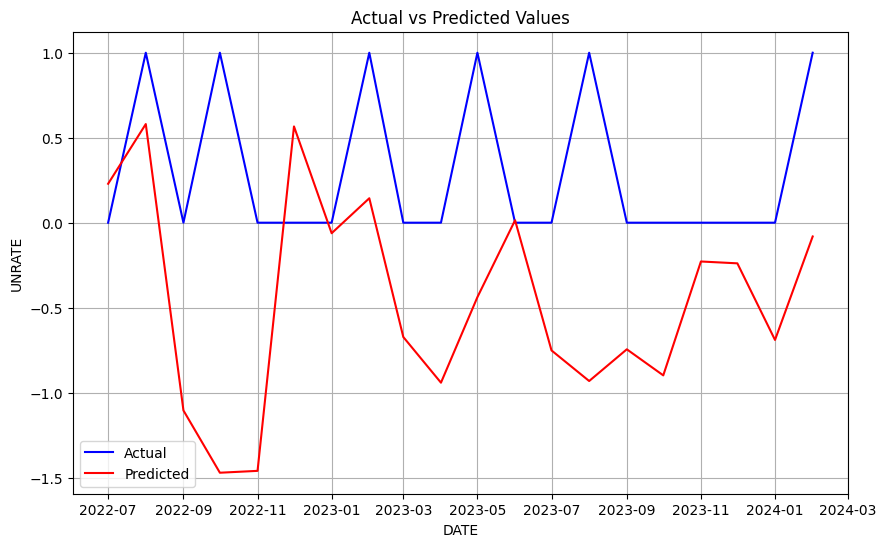

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test.index,nn_y_pred.reshape(20), label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('DATE')
plt.ylabel('UNRATE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_test

DATE
2022-07-01    0
2022-08-01    1
2022-09-01    0
2022-10-01    1
2022-11-01    0
2022-12-01    0
2023-01-01    0
2023-02-01    1
2023-03-01    0
2023-04-01    0
2023-05-01    1
2023-06-01    0
2023-07-01    0
2023-08-01    1
2023-09-01    0
2023-10-01    0
2023-11-01    0
2023-12-01    0
2024-01-01    0
2024-02-01    1
Name: UNRATE_direction, dtype: int64

## **ROC Curve**

1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


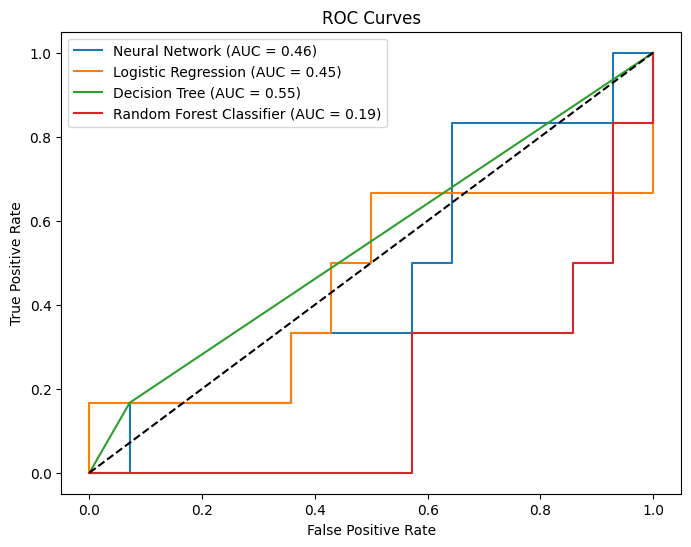

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

nn_y_pred_prob = model.predict(X_test_scaled)

lr_y_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

rfc_y_pred_prob = rfc_model.predict_proba(X_test)[:, 1]

nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, nn_y_pred_prob)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_pred_prob)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred_prob)
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_y_pred_prob)

nn_auc = auc(nn_fpr, nn_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rfc_auc=auc(rfc_fpr,rfc_tpr)

plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest Classifier (AUC = {rfc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


## **Cost Benefit Analysis and Profit Curve**

1/1 [==============================] - 0s 22ms/step


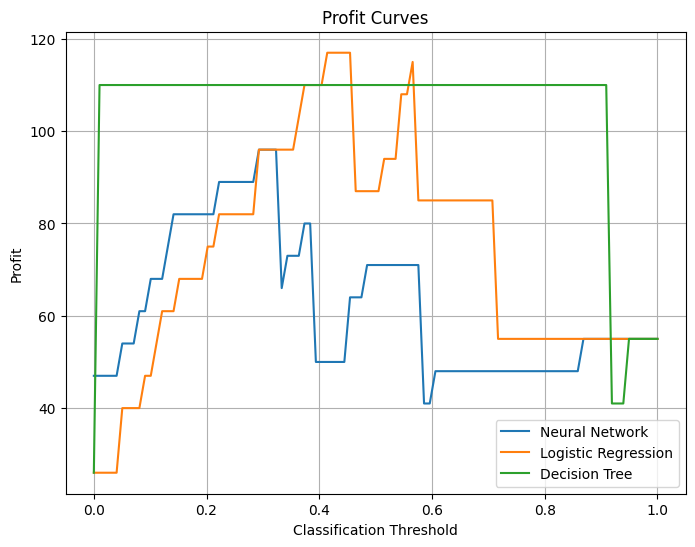

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

nn_y_pred_prob = model.predict(X_test_scaled)

lr_y_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

cost_benefit_matrix = np.array([[5, -2], [-10, 20]])


def calculate_profit(y_true, y_pred_prob, cost_benefit_matrix, thresholds):
    profits = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        profit = np.sum(cm * cost_benefit_matrix)
        profits.append(profit)
    return np.array(profits)

nn_thresholds = np.linspace(0, 1, 100)
lr_thresholds = np.linspace(0, 1, 100)
dt_thresholds = np.linspace(0, 1, 100)

nn_profits = calculate_profit(y_test, nn_y_pred_prob, cost_benefit_matrix, nn_thresholds)
lr_profits = calculate_profit(y_test, lr_y_pred_prob, cost_benefit_matrix, lr_thresholds)
dt_profits = calculate_profit(y_test, dt_y_pred_prob, cost_benefit_matrix, dt_thresholds)

plt.figure(figsize=(8, 6))
plt.plot(nn_thresholds, nn_profits, label='Neural Network')
plt.plot(lr_thresholds, lr_profits, label='Logistic Regression')
plt.plot(dt_thresholds, dt_profits, label='Decision Tree')
plt.xlabel('Classification Threshold')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Actual Decrease', 'Actual Increase']
print("DECISION TREE CLASSIFIER:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("LOGISTIC CLASSIFIER:")
print(classification_report(y_test, lr_y_pred, target_names=target_names))
print("RANDOM FOREST CLASSIFIER:")
print(classification_report(y_test, rfc_y_pred_th, target_names=target_names))
print("NN CLASSIFIER:")
print(classification_report(y_test, nn_y_pred, target_names=target_names))





DECISION TREE CLASSIFIER:
                 precision    recall  f1-score   support

Actual Decrease       0.72      0.93      0.81        14
Actual Increase       0.50      0.17      0.25         6

       accuracy                           0.70        20
      macro avg       0.61      0.55      0.53        20
   weighted avg       0.66      0.70      0.64        20

LOGISTIC CLASSIFIER:
                 precision    recall  f1-score   support

Actual Decrease       0.70      1.00      0.82        14
Actual Increase       0.00      0.00      0.00         6

       accuracy                           0.70        20
      macro avg       0.35      0.50      0.41        20
   weighted avg       0.49      0.70      0.58        20

RANDOM FOREST CLASSIFIER:
                 precision    recall  f1-score   support

Actual Decrease       0.72      0.93      0.81        14
Actual Increase       0.50      0.17      0.25         6

       accuracy                           0.70        20
      m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif